In [2]:
import sqlite3
import pandas as pd

dbfile = 'accident_data_v1.0.0_2023.db'
con=sqlite3.connect(dbfile)

cur = con.cursor()
table_list = [a[0] for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(f'Table names are : {table_list}')
df_accident = pd.read_sql_query('SELECT longitude, latitude From accident', con)

Table names are : ['accident', 'casualty', 'vehicle', 'lsoa']


In [3]:
df_accident = df_accident.dropna() 

In [4]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
Index: 461226 entries, 0 to 461351
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  461226 non-null  float64
 1   latitude   461226 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [5]:
from sklearn.cluster import KMeans
import numpy as np

In [34]:
X = np.array(df_accident)
kmeans = KMeans(n_clusters=25, random_state=0, n_init="auto").fit(X)
labels = kmeans.predict(X)


In [18]:
z = kmeans.cluster_centers_

In [9]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

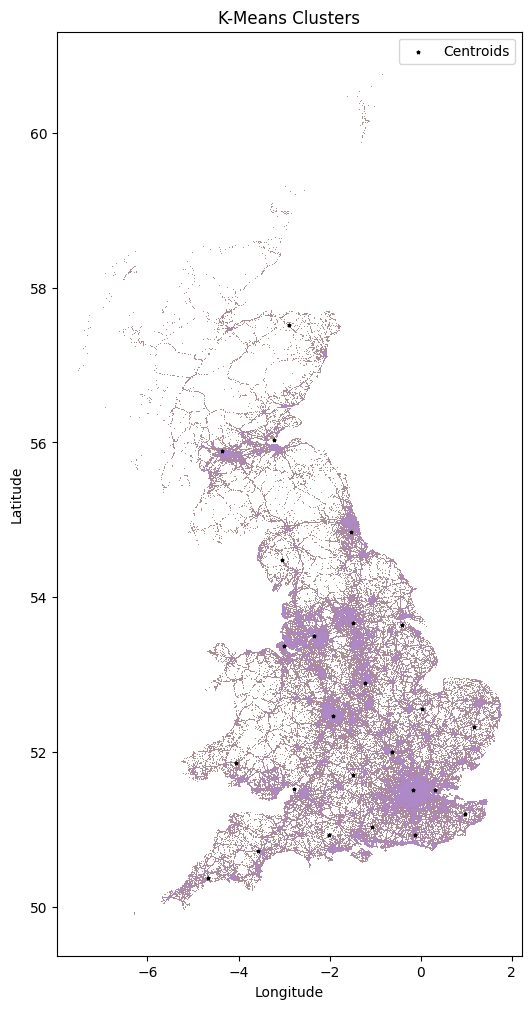

In [36]:
# Filter rows of original data for each cluster label
plt.figure(figsize=(6, 12))
for i in range(25):
    filtered_data = X[labels == i]
    sns.scatterplot(data= df_accident, x= 'longitude', y = 'latitude', s=0.1 )

# Plot the cluster centers (centroids)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=5, color='k', marker='*', label='Centroids')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clusters")
plt.legend()
plt.show()


In [37]:
inertia = kmeans.inertia_
inertia

51892.93363352846

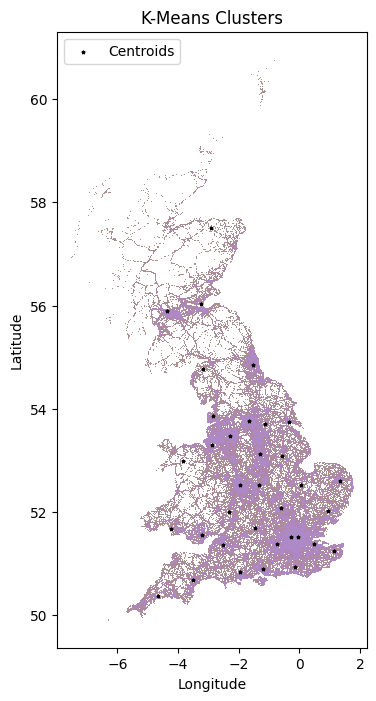

In [38]:
kmeans = KMeans(n_clusters=35, random_state=0, n_init="auto").fit(X)
labels = kmeans.predict(X)
plt.figure(figsize=(4, 8))
for i in range(25):
    filtered_data = X[labels == i]
    sns.scatterplot(data= df_accident, x= 'longitude', y = 'latitude', s=0.1 )

# Plot the cluster centers (centroids)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=5, color='k', marker='*', label='Centroids')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clusters")
plt.legend()
plt.show()

In [39]:
inertia = kmeans.inertia_
inertia

36725.78750908424

In [40]:
df_a2 = pd.read_sql_query('SELECT weather_conditions, speed_limit From accident', con)

In [42]:
df_a2 = df_a2.dropna() 
X = np.array(df_a2)

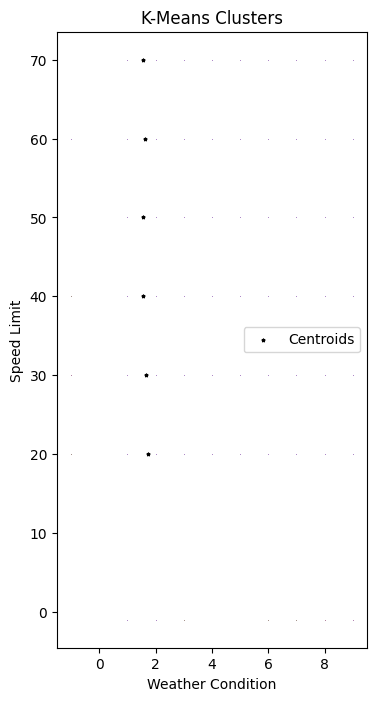

In [44]:
kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X)
labels = kmeans.predict(X)
plt.figure(figsize=(4, 8))
for i in range(25):
    filtered_data = X[labels == i]
    sns.scatterplot(data= df_a2, x= 'weather_conditions', y = 'speed_limit', s=0.1 )

# Plot the cluster centers (centroids)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=5, color='k', marker='*', label='Centroids')

plt.xlabel("Weather Condition")
plt.ylabel("Speed Limit")
plt.title("K-Means Clusters")
plt.legend()
plt.show()